### Using a decision tree to classify mushrooms as either poisonus or edible based on physical featues,population and habitat

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('./mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

### Attributes information

In [36]:
"""
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
"""

'\nAttribute Information: (classes: edible=e, poisonous=p)\n\ncap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s\n\ncap-surface: fibrous=f,grooves=g,scaly=y,smooth=s\n\ncap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y\n\nbruises: bruises=t,no=f\n\nodor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s\n\ngill-attachment: attached=a,descending=d,free=f,notched=n\n\ngill-spacing: close=c,crowded=w,distant=d\n\ngill-size: broad=b,narrow=n\n\ngill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y\n\nstalk-shape: enlarging=e,tapering=t\n\nstalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?\n\nstalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s\n\nstalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s\n\nstalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y\n\nstalk-color-belo

In [37]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat',
       'cap_shape_le', 'cap_surface_le', 'cap_color_le', 'bruises_le',
       'odor_le', 'gill_attachment_le', 'gill_spacing_le', 'gill_size_le',
       'gill_color_le', 'stalk_shape_le', 'stalk_root_le',
       'stalk_surface_above_ring_le', 'stalk_surface_below_ring_le',
       'stalk_color_above_ring_le', 'stalk_color_below_ring_le',
       'veil_type_le', 'veil_color_le', 'ring_number_le', 'ring_type_le',
       'spore_print_color_le', 'population_le', 'habitat_le'],
      dtype='object')

### Encoding the categorical variables using LabelEncoder

In [38]:
from sklearn.preprocessing import LabelEncoder


In [39]:
cap_shape_le = LabelEncoder()
cap_surface_le = LabelEncoder()
cap_color_le = LabelEncoder()
bruises_le = LabelEncoder()
odor_le = LabelEncoder()
gill_attachment_le = LabelEncoder()
gill_spacing_le = LabelEncoder()
gill_size_le = LabelEncoder()
gill_color_le = LabelEncoder()
stalk_shape_le = LabelEncoder()
stalk_root_le = LabelEncoder()
stalk_surface_above_ring_le = LabelEncoder()
stalk_surface_below_ring_le = LabelEncoder()
stalk_color_above_ring_le = LabelEncoder()
stalk_color_below_ring_le = LabelEncoder()
veil_type_le = LabelEncoder()
veil_color_le = LabelEncoder()
ring_number_le = LabelEncoder()
ring_type_le = LabelEncoder()
spore_print_color_le = LabelEncoder()
population_le = LabelEncoder()
habitat_le = LabelEncoder()

In [40]:
df['cap_shape_le'] = cap_shape_le.fit_transform(df['cap-shape'])
df['cap_surface_le'] = cap_surface_le.fit_transform(df['cap-surface'])
df['cap_color_le'] = cap_color_le.fit_transform(df['cap-color'])
df['bruises_le'] = bruises_le.fit_transform(df['bruises'])
df['odor_le'] = odor_le.fit_transform(df['odor'])
df['gill_attachment_le'] = gill_attachment_le.fit_transform(df['gill-attachment'])
df['gill_spacing_le'] = gill_spacing_le.fit_transform(df['gill-spacing'])
df['gill_size_le'] = gill_size_le.fit_transform(df['gill-size'])
df['gill_color_le'] = gill_color_le.fit_transform(df['gill-color'])
df['stalk_shape_le'] = stalk_shape_le.fit_transform(df['stalk-shape']) 
df['stalk_root_le'] = stalk_root_le.fit_transform(df['stalk-root'])
df['stalk_surface_above_ring_le'] = stalk_surface_above_ring_le.fit_transform(df['stalk-surface-above-ring']) 
df['stalk_surface_below_ring_le'] = stalk_surface_below_ring_le.fit_transform(df['stalk-surface-below-ring']) 
df['stalk_color_above_ring_le'] = stalk_color_above_ring_le.fit_transform(df['stalk-color-above-ring'])
df['stalk_color_below_ring_le'] = stalk_color_below_ring_le.fit_transform(df['stalk-color-below-ring'])
df['veil_type_le'] = veil_type_le.fit_transform(df['veil-type'])
df['veil_color_le'] = veil_color_le.fit_transform(df['veil-color'])
df['ring_number_le'] = ring_number_le.fit_transform(df['ring-number'])
df['ring_type_le'] = ring_type_le.fit_transform(df['ring-type'])
df['spore_print_color_le'] = spore_print_color_le.fit_transform(df['spore-print-color'])
df['population_le'] = population_le.fit_transform(df['population'])
df['habitat_le'] = habitat_le.fit_transform(df['habitat'])

In [41]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat',
       'cap_shape_le', 'cap_surface_le', 'cap_color_le', 'bruises_le',
       'odor_le', 'gill_attachment_le', 'gill_spacing_le', 'gill_size_le',
       'gill_color_le', 'stalk_shape_le', 'stalk_root_le',
       'stalk_surface_above_ring_le', 'stalk_surface_below_ring_le',
       'stalk_color_above_ring_le', 'stalk_color_below_ring_le',
       'veil_type_le', 'veil_color_le', 'ring_number_le', 'ring_type_le',
       'spore_print_color_le', 'population_le', 'habitat_le'],
      dtype='object')

In [12]:
inputs = df.drop(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'], axis='columns')

In [42]:
inputs

,cap_shape_le,cap_surface_le,cap_color_le,bruises_le,odor_le,gill_attachment_le,gill_spacing_le,gill_size_le,gill_color_le,stalk_shape_le,...,stalk_surface_below_ring_le,stalk_color_above_ring_le,stalk_color_below_ring_le,veil_type_le,veil_color_le,ring_number_le,ring_type_le,spore_print_color_le,population_le,habitat_le
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [43]:
class_le = LabelEncoder()
target = class_le.fit_transform(df['class'])

In [44]:
target

array([1, 0, 0, ..., 0, 1, 0])

### splitting the data into training and testing sets

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=0)

### Decision Tree

In [47]:
from sklearn import tree

In [48]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

#### The decision tree's score/performance

In [49]:
model.score(X_test, y_test)

1.0

In [50]:
y_predicted = model.predict(X_test)

#### visualizing the decision tree's performance using a confusion matrix

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
cm = confusion_matrix(y_predicted, y_test)

Text(42.0, 0.5, 'True values')

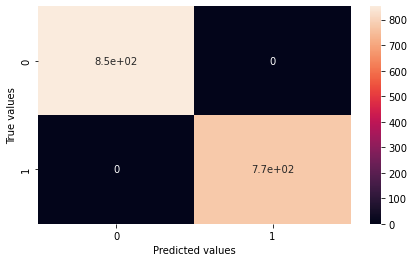

In [53]:
plt.figure(figsize = (7,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')

In [54]:
model.predict([inputs.iloc[7000,:]])

array([1])

In [55]:
target[7000]

1